#### Mineração de Processos

# Descoberta do Processo (Process Discovery)

### Os algoritmos de descoberta de processos desejam encontrar um modelo de processo adequado que descreva a ordem dos eventos / atividades que são executados durante a execução de um processo.

-------------------------------------------------------------------------------------------------------------------------------

## Algoritmo Alpha
### 1. ALPHA MINER
#### - É UM DOS ALGORITMOS MAIS CONHECIDOS SOBRE DESCOBERTA DO PROCESSO.
#### - RETORNA O PROCESSO MODELADO EM REDE PETRI COM SUA MARCAÇÃO INICIAL E FINAL.
#### DESVANTAGENS:
#### - NÃO CONSEGUE TRABALHAR BEM COM LOOPS DE COMPRIMENTO UM E DOIS.
#### - TAREFAS INVISÍVEIS E DUPLICADAS NÃO PODEM SER DESCOBERTAS.
#### - O MODELO DESCOBERTO PODE NÃO SER SÓLIDO.
#### - FRACO CONTRA O RUÍDO.

-------------------------------------------------------------------------------------------------------------------------------

### 2. ALPHA +
#### - VANTAGEM
#### - CONSEGUE TRABALHAR BEM COM LOOPS DE COMPRIMENTO UM E DOIS.
#### DESVANTAGENS
#### - TAREFAS INVISÍVEIS E DUPLICADAS NÃO PODEM SER DESCOBERTAS.
#### - O MODELO DESCOBERTO PODE NÃO SER SÓLIDO.
#### - FRACO CONTRA O RUÍDO.

-------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Instalação da biblioteca PM4PY

In [1]:
pip install pm4py

Note: you may need to restart the kernel to use updated packages.


In [76]:
# Importando as bibliotecas Pandas e PM4PY
import pandas as pd
import pm4py

# Importando classes para importação de arquivos do formato xes.
from pm4py.objects.log.importer.xes import importer as xes_importer

In [77]:
# Armazenando o arquivo teste.xes na variável log.
# A variável log é do tipo EventLog da Biblioteca PM4PY.
# Ela é apresentada no formato de um dicionário.

In [78]:
log = xes_importer.apply("teste.xes")

In [79]:
log

[{'attributes': {'concept:name': '3', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2010, 12, 30, 14, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'pay compensation', 'org:resource': 'Ellen', 'time:timestamp': datetime.datetime(2011, 1, 15, 10, 45, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'pay compensation', 'Resource': 'Ellen', 'Costs': '200'}]}, '....', {'attributes': {'concept:name': '4', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2011, 1, 6, 15, 2, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'reject request', 'org:resource': 'Ellen', 'time:timestamp': 

In [80]:
# Importando o Algoritmo Alpha da Biblioteca
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

In [81]:
# Aplicando o algorítmo Alpha.
# net corresponde a Rede Petri gerada
# initial_marking corresponde ao marco inicial
# final_marking corresponde ao marco final

net, initial_marking, final_marking = alpha_miner.apply(log)

In [82]:
net

In [83]:
initial_marking

['start:1']

In [84]:
final_marking

['end:1']

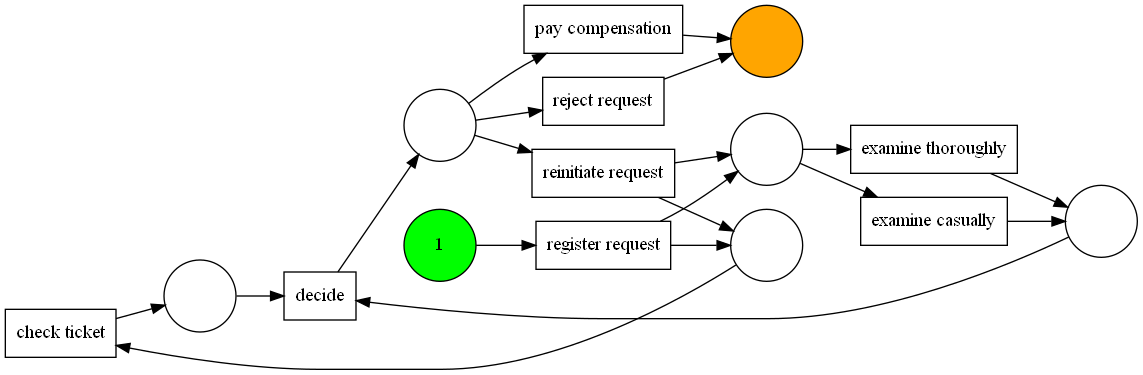

In [85]:
#Importando o Visualizer para Redes de Petri e o Diagrah
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from graphviz import Digraph

# Gerando o objeto da Rede de Petri da Biblioteca Graphviz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)

# Visualizando a Rede de Petri
pn_visualizer.view(gviz)

-------------------------------------------------------------------------------------------------------------------------------

### 3. HEURISTIC MINER
#### Heuristics Miner é um algoritmo que atua no Directly-Follows Graph, fornecendo uma maneira de lidar com o ruído e encontrar construções comuns (dependência entre duas atividades). 
#### A saída do Heuristics Miner é uma Heuristics Net, ou seja, um objeto que contém as atividades e os relacionamentos entre elas. #### É possível ter uma Rede Heurística e uma Rede de Petri.
#### - VANTAGEM
#### - LEVA A FREQUÊNCIA EM CONSIDERAÇÃO.
#### - DETECTA LOOPS CURTOS.
#### DESVANTAGENS
#### - O MODELO DESCOBERTO PODE NÃO SER SÓLIDO.

In [22]:
# Importando classes para importação de arquivos do formato xes.
from pm4py.objects.log.importer.xes import importer as xes_importer

# Importando o arquivo teste.xes
log = xes_importer.apply("teste.xes")

In [23]:
# Importando o Heuristics_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

In [24]:
# Aplicando o Heuristics_miner no log.
# Abaixo segue os parâmetros.

In [25]:
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

### Parâmetros do Heuristics Miner

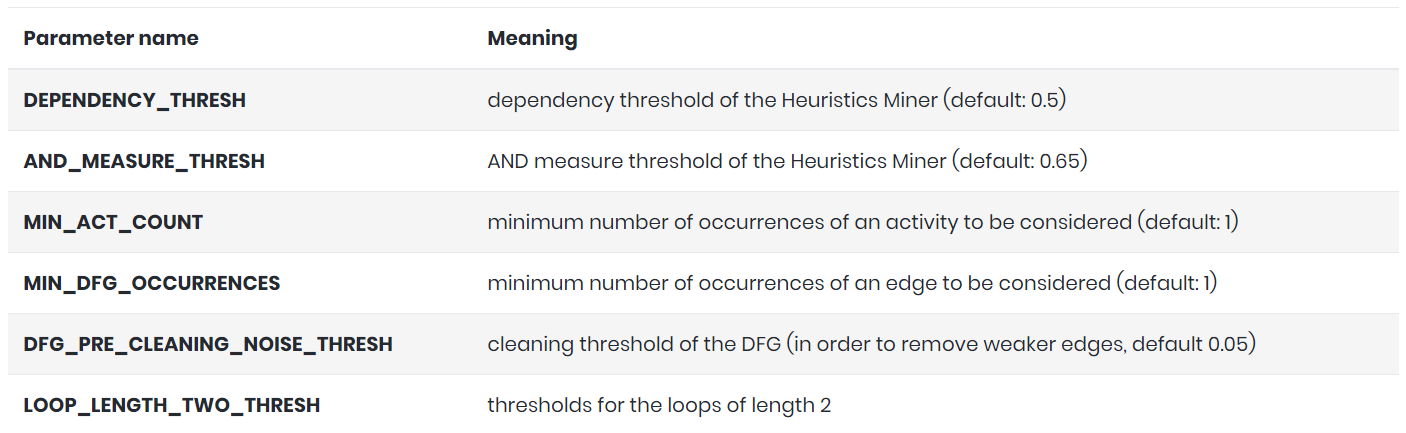

In [20]:
from IPython.display import Image
Image(filename='Parameter_Heuristic_Miner.png', width=1000, height=1000)

### Visualizando a Heuristic Net

In [29]:
# Instalando o Graphviz
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [30]:
import graphviz

In [39]:
pip install cgraph

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Importando o Visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

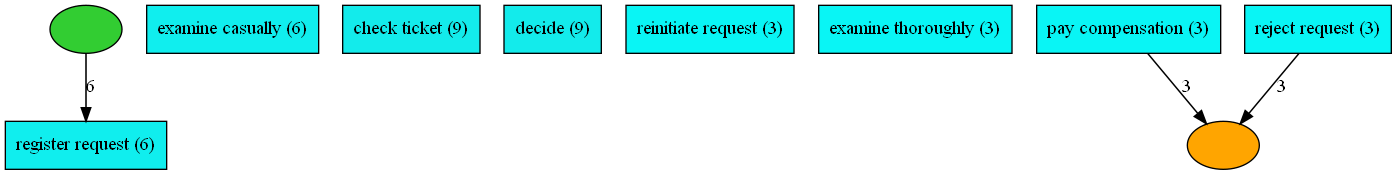

In [42]:
# Aplicando o Visualizer para Visualização do Heuristic Net
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

### Visualizando o algoritmo Heurístico - Redes de Petri

In [45]:
# Importando o Algoritmo Heuristics_miner da Biblioteca PM4PY
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

In [46]:
# Aplicando o Algoritmo Heuristics
# Net armazena a Rede, im armazena o marco inicial, fm armazena o marco final.
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

In [47]:
# Importando o Visualizer para visualização da Rede de Petri
from pm4py.visualization.petrinet import visualizer as pn_visualizer

In [51]:
from graphviz import Digraph

In [52]:
# Gerando o objeto da Rede de Petri da Biblioteca Graphviz
gviz = pn_visualizer.apply(net, im, fm)

In [53]:
type(gviz)

graphviz.dot.Digraph

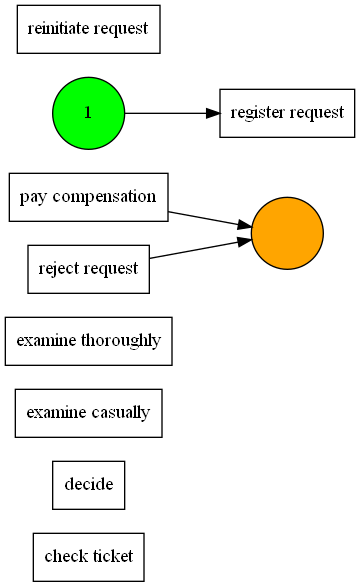

In [54]:
# Visualizando a Rede de Petri
pn_visualizer.view(gviz)

-------------------------------------------------------------------------------------------------------------------------------

### 4. Indutivo (Inductive) - IMDFc
#### O IMDFc é uma implementação específica do algoritmo Inductive Miner Directly Follows.
#### Este algoritmo visa construir uma rede de workflow sólida, com bons valores de adequação (na maioria dos casos, garantindo adequação de repetição perfeita). 
#### O minerador Indutivo tem a ideia de detectar um 'corte' no Log (por exemplo, um corte sequencial, um corte paralelo, um corte simultâneo e um corte no loop), e então recorrer em sublogs, que foram encontrados aplicando o corte, até que um caso base seja encontrado. A variante Directly Follows evita a recursão nos sublogs, mas usa o gráfico Directly Follows.
#### Os modelos IMDFc geralmente fazem uso extensivo de transições ocultas, especialmente para pular/fazer loop em uma parte do modelo. Além disso, cada transição visível possui um rótulo exclusivo (não há transições no modelo que compartilhem o mesmo rótulo).
#### Dois modelos de processo podem ser derivados: Rede de Petri e Árvore de Processos.
#### - VANTAGENS
#### - PODE LIDAR COM TAREFAS INVISÍVEIS.
#### - CRIA UM MODELO SÓLIDO.
#### - É O ALGORITMO DE MINERAÇÃO DE PROCESSOS MAIS USADO

### Gerando Redes de Petri a partir do IMDFc

In [57]:
# Importando o algoritmo do inductive_miner
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

In [ ]:
# Importando o arquivo teste.xes

In [58]:
log = xes_importer.apply("teste.xes")

In [ ]:
# Aplicando o algoritmo Inductive Miner

In [59]:
net, initial_marking, final_marking = inductive_miner.apply(log)

In [75]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from graphviz import Digraph

In [61]:
# Gerando o objeto da Rede de Petri da Biblioteca Graphviz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)

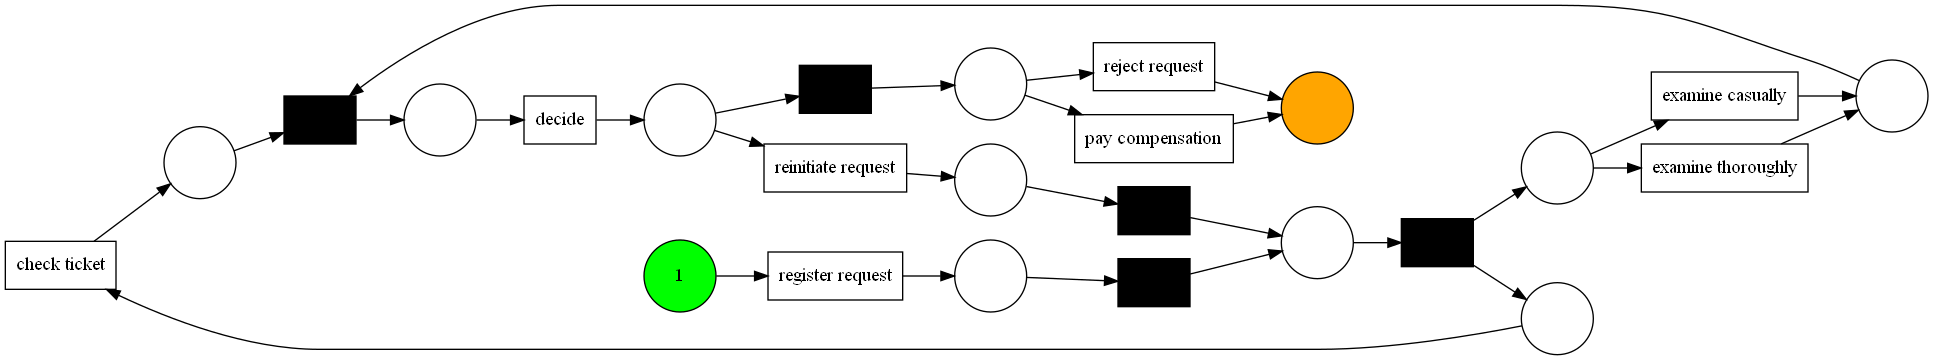

In [62]:
# Visualizando a Rede de Petri
pn_visualizer.view(gviz)

### Gerando um Processo em Árvore a partir do IMDFc

In [64]:
# Importando Algoritmo Inductive Miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

# Importando o Visualizer para Árvore de Processos
from pm4py.visualization.process_tree import visualizer as pt_visualizer

In [65]:
# tree recebe a árvore de processos do algoritmo Inductive Miner
tree = inductive_miner.apply_tree(log)

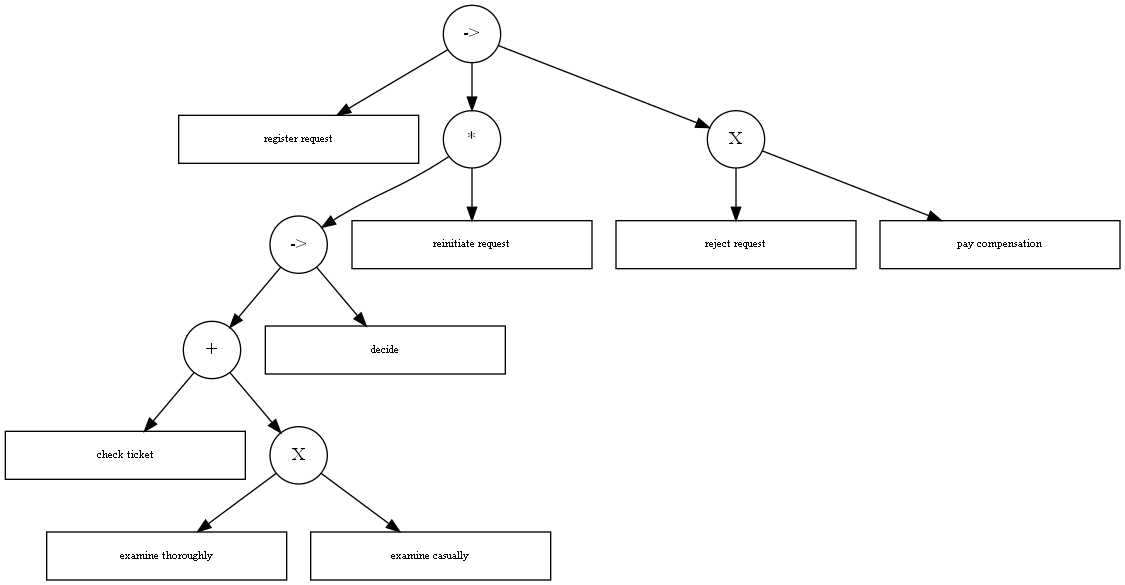

In [66]:
# Gerando o gráfico como o Graphivz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

### Convertendo uma Árvore de Processos em uma Rede de Petri

In [68]:
# Importando a biblioteca de conversão
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [69]:
# Convertendo uma Árvore de Processos para Rede de Petri
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)

-------------------------------------------------------------------------------------------------------------------------------

### Gráfico de Seguimento Direto (Directly-Follows Graph)

#### Os processos modelados com as Redes de Petri possuem uma semântica bem definida: a execução de um processo começa nos locais incluídos na marcação inicial e termina nos locais incluídos na marcação final.
####  Os gráficos Directly-Follows são gráficos em que os nós representam os eventos/atividades no registro e as bordas direcionadas estão presentes entre os nós se houver pelo menos um traço no registro onde o evento/atividade de origem é seguido pelo evento/atividade alvo. 
#### No topo dessas bordas direcionadas, é fácil representar métricas como FREQUÊNCIA (contando o número de vezes que o evento/atividade de origem é seguido pelo evento/atividade de destino) e DESEMPENHO (alguma agregação, por exemplo, a média, de intervalo de tempo - decorrido entre os dois eventos/atividades).

In [86]:
# Importando o pacote Importer
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
# Importando o arquivo
log = xes_importer.apply("teste.xes")

In [87]:
# Importando o Algoritmo do Directly-Follows Graph
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# Aplicando o Directly-Follows Graph no Log
dfg = dfg_discovery.apply(log)

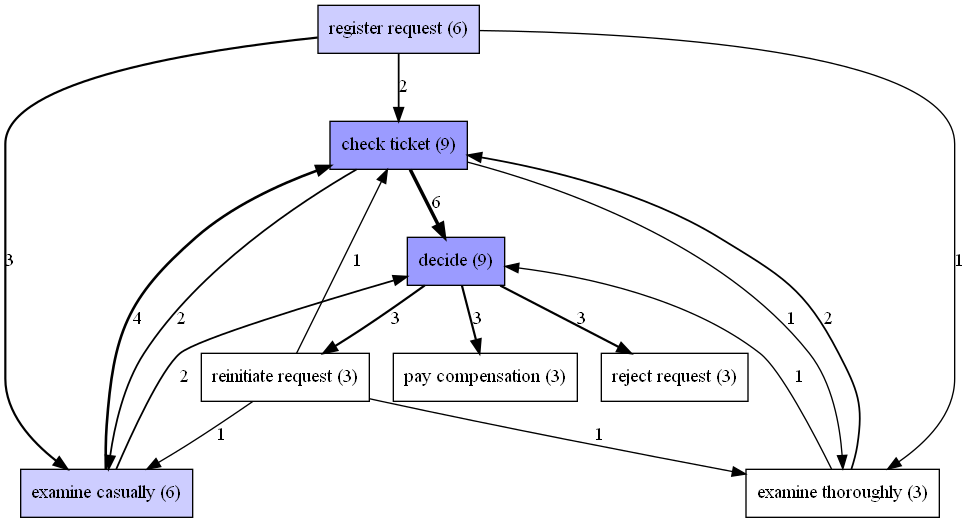

In [90]:
# Importando o Pacote Visualizer do Graphviz.
from pm4py.visualization.dfg import visualizer as dfg_visualization

# Plotando a visualização do Directly-Follows Graph - FREQUÊNCIA
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

### Obtendo um gráfico Directly-Follows com o desempenho entre as bordas.

In [89]:
# Importando algoritmo 
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

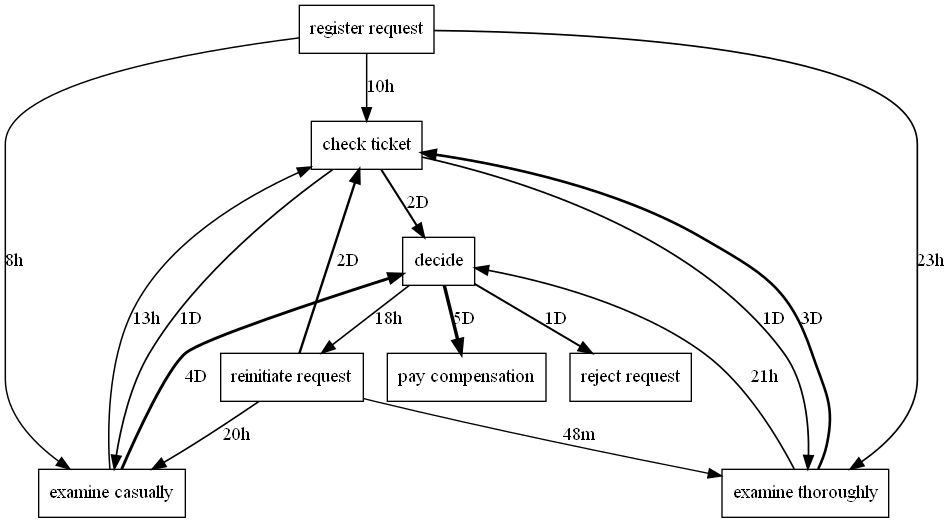

In [91]:
# Plotando a visualização do Directly-Follows Graph - PERFORMANCE
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

### Salvando o "dfg" obtido em outros formatos, como no formato SVG, por exemplo

#### Um arquivo SVG é um arquivo gráfico que usa um formato gráfico vetorial bidimensional criado pelo World Wide Web Consortium (W3C). Ele descreve imagens usando um formato de texto baseado em XML. Os arquivos SVG são desenvolvidos como um formato padrão para exibir gráficos vetoriais na Web.
#### O arquivo .svg abre em um Navegador Web.

In [92]:
# Importando as Bibliotecas
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

In [93]:
# Aplicando o algoritmo dfg no log de eventos.
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

In [94]:
# Salvando o dfg no formato .svg
parameters = {dfg_visualization.Variants.PERFORMANCE.value.Parameters.FORMAT: "svg"}
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE, parameters=parameters)
dfg_visualization.save(gviz, "dfg.svg")

### Convertendo um gráfico Directly-Follows em um Workflow Net

#### O Gráfico Directly-Follows é a representação de um processo fornecido por muitas ferramentas comerciais. 
#### Uma ideia de Sander Leemans é converter o DFG em uma rede de workflow que imite perfeitamente o DFG para poder realizar alinhamentos entre o comportamento descrito no modelo e o comportamento descrito no log. Isso é chamado de MINERAÇÃO DFG.

In [102]:
# Importando o pacote Importer e o arquivo teste.xes
from pm4py.objects.log.importer.xes import importer as xes_importer
import os
log = xes_importer.apply("teste.xes")

In [103]:
# Importando o Algoritmo DFG_discovery
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

In [105]:
# Importando o Converter
from pm4py.objects.conversion.dfg import converter as dfg_mining
net, im, fm = dfg_mining.apply(dfg)

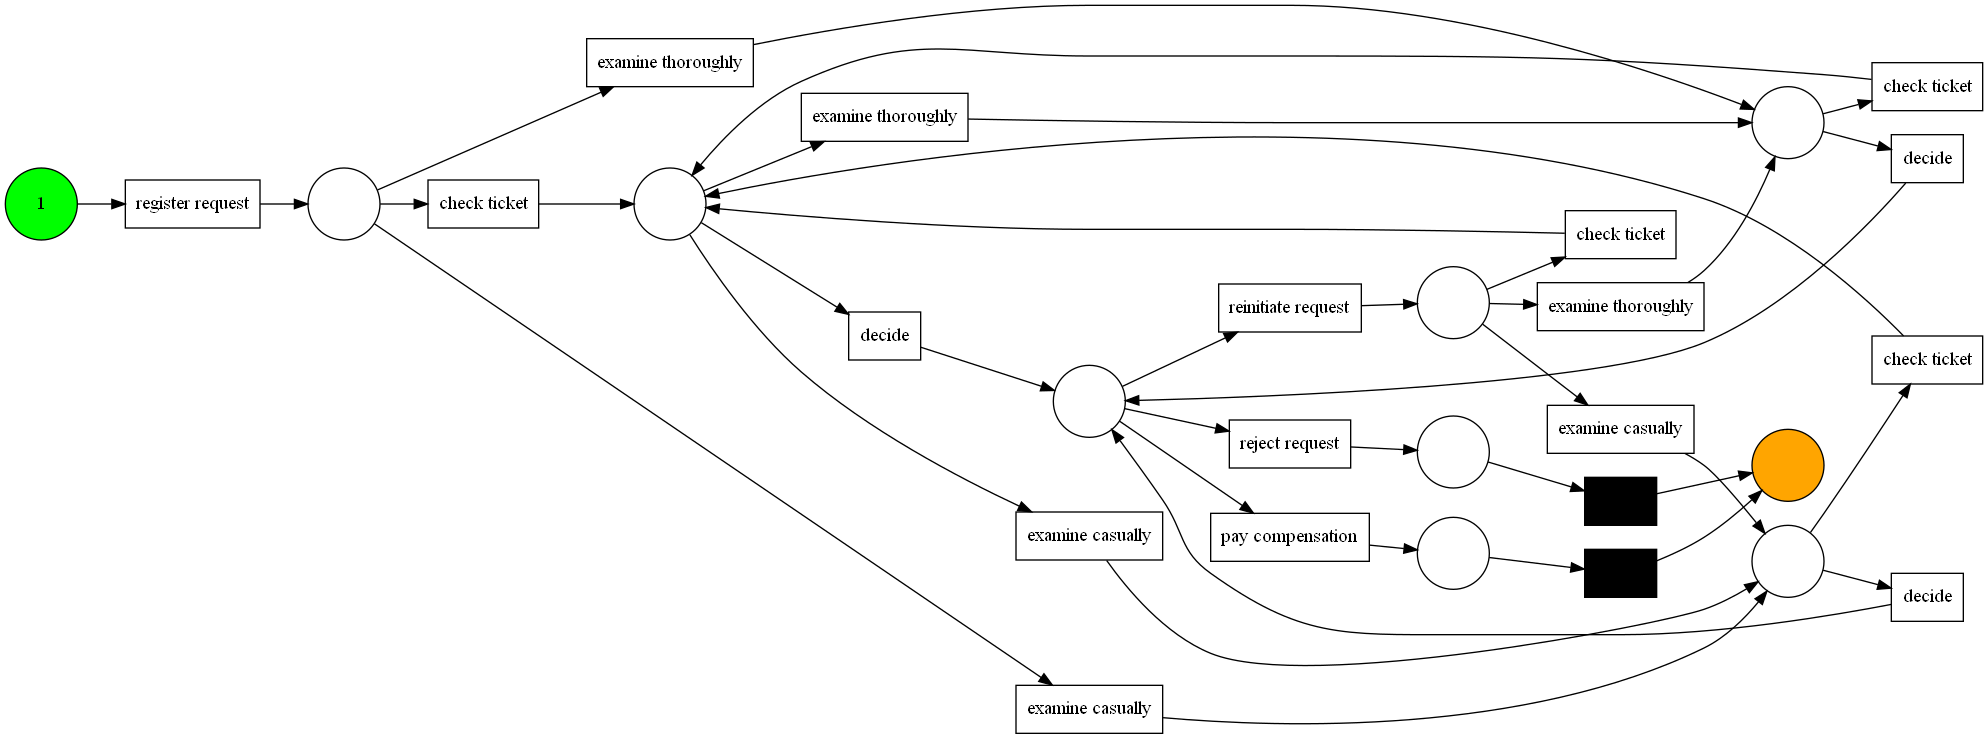

In [106]:
# Plotando a Rede de Petri.

# Gerando o objeto da Rede de Petri da Biblioteca Graphviz
gviz = pn_visualizer.apply(net, im, fm)

# Visualizando a Rede de Petri
pn_visualizer.view(gviz)

### Adicionando informações de Frequência e Performance e Salvando como .png

#### Semelhante ao gráfico Directly Follows, também é possível decorar a rede de Petri com informações de frequência ou desempenho. 
#### Isso é feito usando uma técnica de reprodução no modelo e, em seguida, atribuindo frequência/desempenho (performance) aos caminhos. O parâmetro variant do visualizador especifica qual anotação deve ser usada. 
#### Os valores do parâmetro variant são os seguintes:

#### pn_visualizer.Variants.WO_DECORATION: Este é o valor padrão e indica que a Rede de Petri não está decorada.
#### pn_visualizer.Variants.FREQUENCY:Isso indica que o modelo deve ser decorado de acordo com as informações de frequência obtidas pela aplicação de replay.
#### pn_visualizer.Variants.PERFORMANCE: Isso indica que o modelo deve ser decorado de acordo com as informações de desempenho (agregadas por média) obtidas pela aplicação de replay.

#### Caso sejam escolhidos a frequência e a decoração da performance, é necessário passar o log como parâmetro de visualização.

In [107]:
# Importando o Visualizer
from pm4py.visualization.petrinet import visualizer as pn_visualizer

# Configurando a frequência.
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.save(gviz, "inductive_frequency.png")

-------------------------------------------------------------------------------------------------------------------------------

### CLASSIFICADOR

#### Os algoritmos implementados em pm4py assumem a classificação de eventos com base em seu nome de atividade, que geralmente é relatado dentro do concept:name (event attribute) . 
#### Em alguns contextos, é útil usar outros atributos de evento como atividade, como por exemplo:
#### - Ao importar um log de eventos de um CSV,  o concept:name pode não estar definido.
#### - Multiplos eventos em um 'Case' podem se referir a diferentes ciclos de vida de uma mesma atividade.

In [108]:
# O exemplo abaixo mostra a especificação de uma atividade-chave para um algoritmo Alpha Miner.

In [109]:
# Importando o Importer e o Algoritmo Alpha.
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Importando o arquivo .xes
log = xes_importer.apply("teste.xes")

In [112]:
# Especificando o parâmetro concept:name como atividade-chave.
parameters = {alpha_miner.Variants.ALPHA_VERSION_CLASSIC.value.Parameters.ACTIVITY_KEY: "concept:name"}
net, initial_marking, final_marking = alpha_miner.apply(log, parameters=parameters)

####  Para logs importados do formato .XES, uma lista de campos poderiam ser usados para classificar eventos e aplicar algoritmos da Mineração de Processos são reportados na seção de Classificadores. 
#### O classificador padrão (standard) geralmente inclui o nome da atividade (concept:name attibute) e o ciclo de vida (lifecycle:transition attribute). 
#### O classificador Event name inclui apenas o nome da atividade.
#### Em PM4Py, assume-se que os algoritmos funcionam em uma única chave de atividade. Para usar vários campos, um novo atributo deve ser inserido para cada evento como a concatenação dos dois.

In [118]:
# O exemplo abaixo demonstra a recuperação dos classificadores dentro de um arquivo de log, usando o log do recibo.xes. 
# O comando print retorna um dicionário, onde o atributo classificador correspondente é revelado.

In [115]:
import os
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("receipt.xes")
print(log.classifiers)


{'Activity classifier': ['concept:name', 'lifecycle:transition'], 'Resource classifier': ['org:resource'], 'Group classifier': ['org:group']}


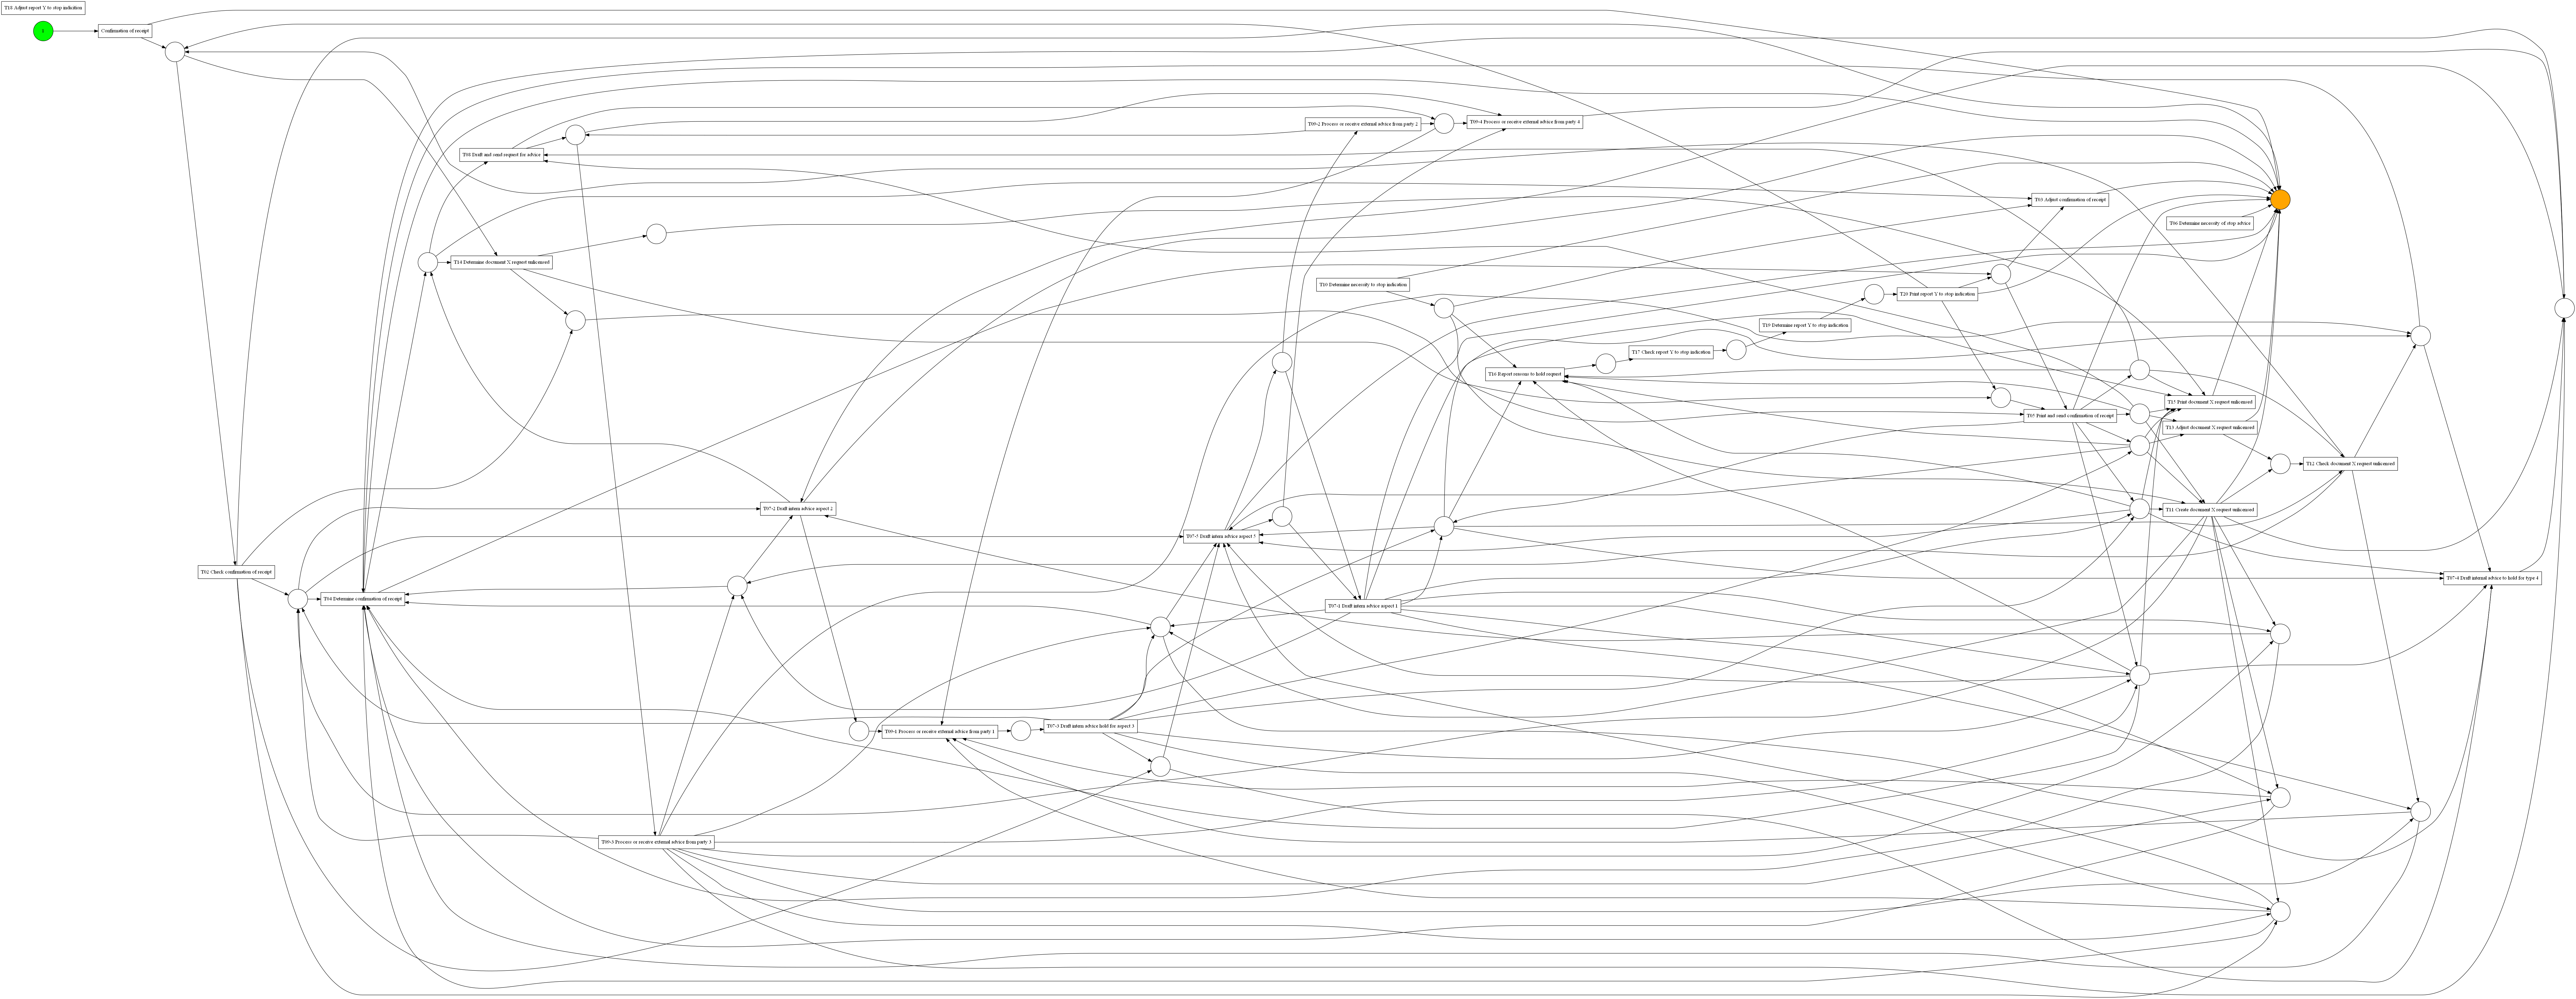

In [117]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, im, fm = alpha_miner.apply(log)

# Gerando o objeto da Rede de Petri da Biblioteca Graphviz e Plotando o Gráfico.
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

-------------------------------------------------------------------------------------------------------------------------------

In [119]:
# Para usar o classificador "Activity classifier" e escrever um novo atributo para cada evento no log.

In [120]:
from pm4py.objects.log.util import insert_classifier
log, activity_key = insert_classifier.insert_activity_classifier_attribute(log, "Activity classifier")

In [121]:
log

[{'attributes': {'startdate': datetime.datetime(2011, 10, 11, 13, 42, 22, 688000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'responsible': 'Resource21', 'enddate_planned': datetime.datetime(2011, 12, 6, 13, 41, 31, 788000, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'department': 'General', 'group': 'Group 2', 'concept:name': 'case-10011', 'deadline': datetime.datetime(2011, 12, 6, 13, 41, 31, 788000, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'channel': 'Internet'}, 'events': [{'org:group': 'Group 1', 'concept:instance': 'task-42933', 'org:resource': 'Resource21', 'concept:name': 'Confirmation of receipt', 'time:timestamp': datetime.datetime(2011, 10, 11, 13, 45, 40, 276000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'lifecycle:transition': 'complete', '@@classifier': 'Confirmation of receipt+complete'}, '..', {'org:group': 'Group 4', 'concept:instance': 'task-47958', 'org:resource': 'Resource21', 'concept:name': 

In [122]:
activity_key

'@@classifier'

In [123]:
# Então, como antes, o Alpha Miner pode ser aplicado no log especificando a chave de atividade recém-inserida.

In [127]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
parameters = {alpha_miner.Variants.ALPHA_VERSION_CLASSIC.value.Parameters.ACTIVITY_KEY:activity_key}
net, initial_marking, final_marking = alpha_miner.apply(log, parameters=parameters)

In [128]:
# A seguir, é mostrada uma técnica para inserir um novo atributo manualmente.
# Nesse caso, o .XES não especifica classificadores, devendo ser utilizado um campo diferente como:
# chave de atividade, havendo a opção de especificá-lo manualmente. 
# Por exemplo, neste trecho de código, lemos o log do recibo.xes e criamos um novo atributo chamado customClassifier,
# que é o nome da atividade mais a transição. Posteriormente, o Alpha Miner pode ser aplicado neste novo classificador.

In [130]:
import os
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("receipt.xes")
for trace in log:
 for event in trace:
  event["customClassifier"] = event["concept:name"] + event["lifecycle:transition"]

from pm4py.algo.discovery.alpha import algorithm as alpha_miner
parameters = {alpha_miner.Variants.ALPHA_VERSION_CLASSIC.value.Parameters.ACTIVITY_KEY: "customClassifier"}
net, initial_marking, final_marking = alpha_miner.apply(log, parameters=parameters)

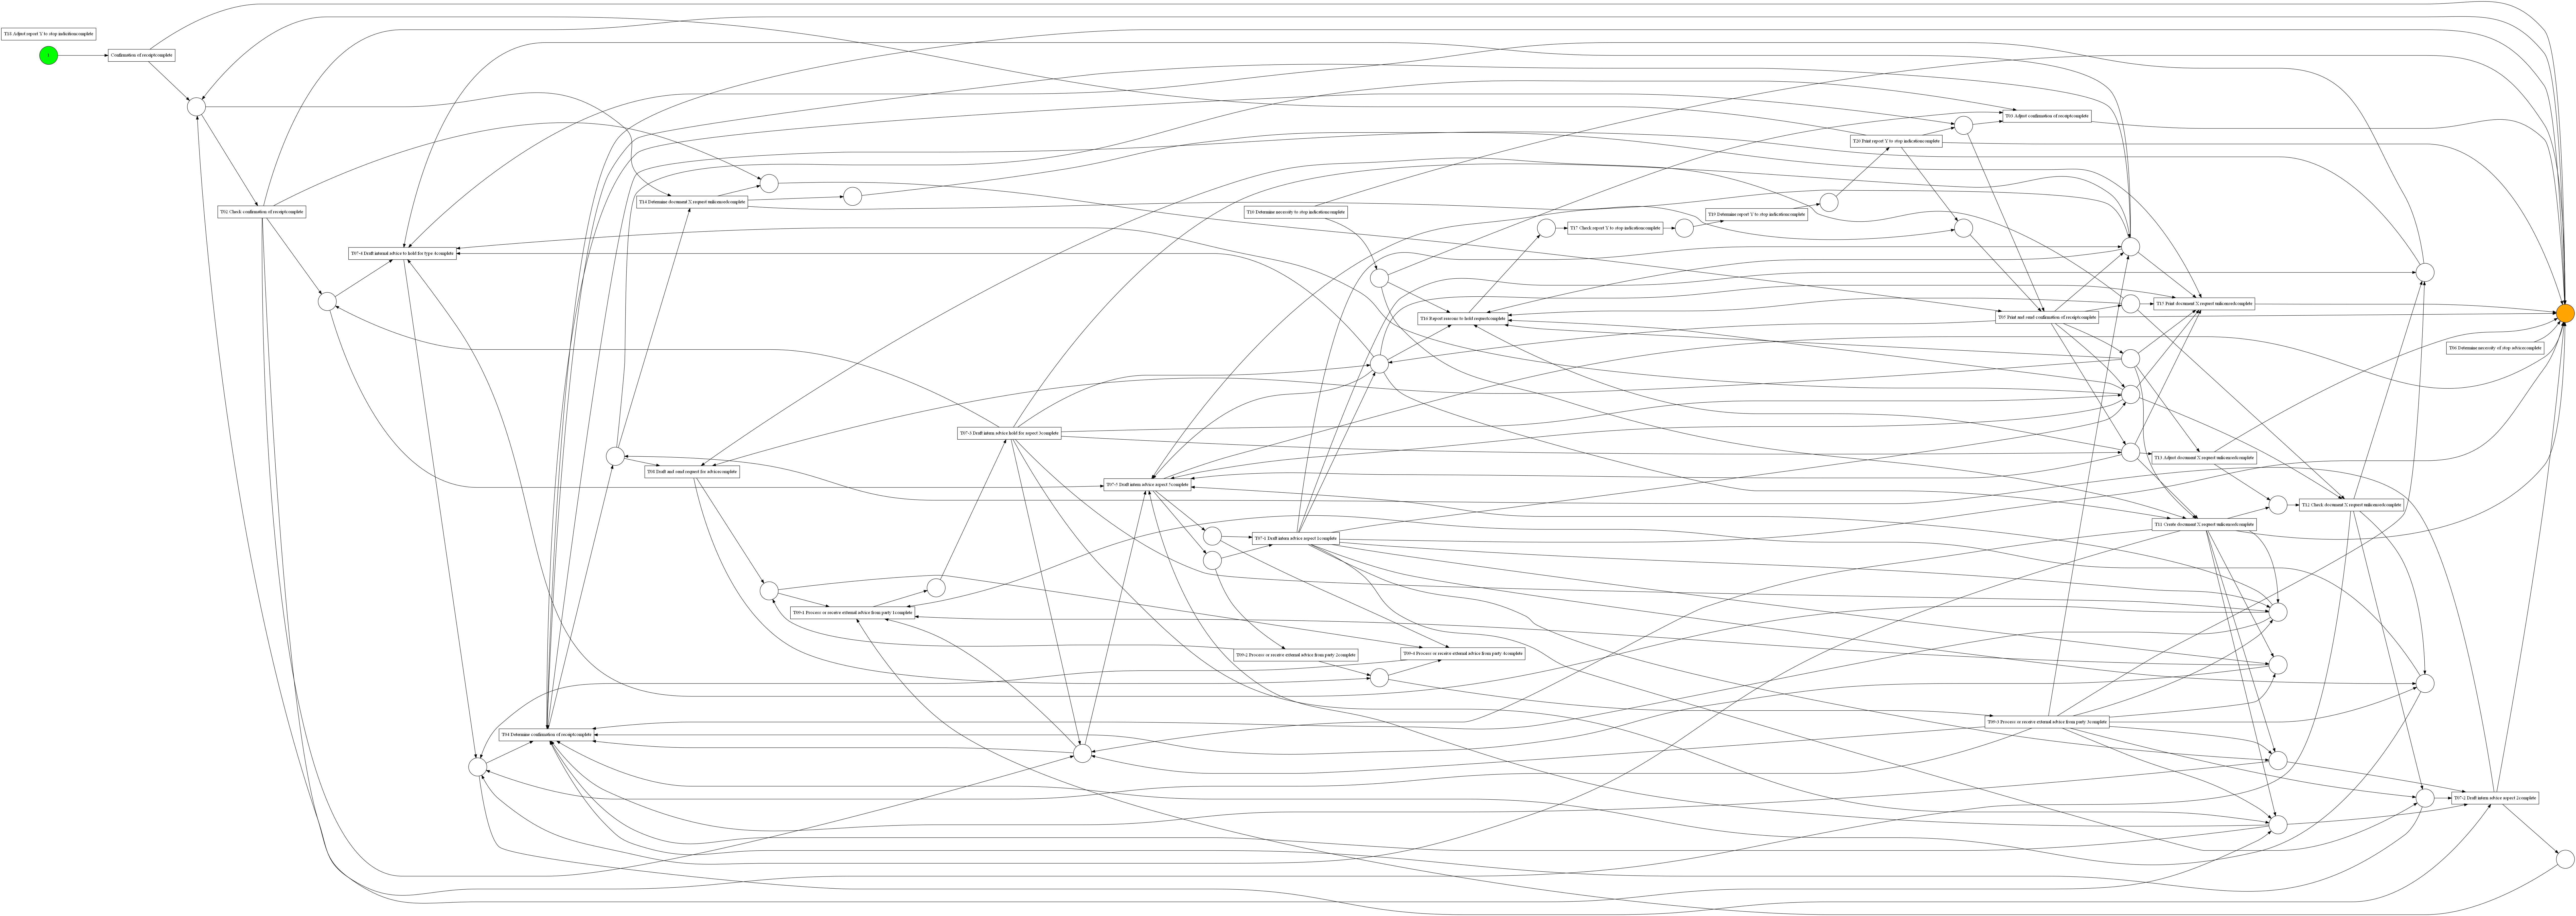

In [131]:
# Gerando o objeto da Rede de Petri da Biblioteca Graphviz e Plotando o Gráfico.
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)